# **Тема**: Моделювання та оптимізація роботи каво-автоматів в офісному комплексі.

- Уявімо ситуацію при якій має місце “підприємець”, який хоче облаштувати певну зону обслуговування в офісному комплексі n-ою кількістю каво-автоматів.
- Облаштувати її він хоче таким чином, щоб потік клієнтів був наближеним до постійного, тобто черги були мінімальними, і не було лишніх автоматів, які стояли б без діла.
- Поки, що ця зона складається з m автоматів.
- Підприємець може зробити власне дослідження. Протягом певного періоду часу, який, наприклад, складатиме 30 днів, кожного дня з 8 до 18 він прослідковуватиме інтенсивність потоку клієнтів щогодини.
    - 1 день:
    - 8:00 - 9:00 - 40 клієнтів
    - 9:00 - 10:00 - 55 клієнтів
    - …
    - 2 день:
    - 8:00 - 9:00 - 35 клієнтів
    - 9:00 - 10:00 - 40 клієнтів
    - …
- Таким чином будуть отримані вибірки з 30 значень до кожної години. Визначивши вибіркове середнє і дисперсію, він зможе визначити розкид значень відносно виб. середнього (мат. сподівання) і відповідно зробити певні висновки щодо того чи є ця вибірка репрезентативною. Якщо так, то він згрупує вибіркові середні (мат. сподівання), що відносяться до кожної години. Вони і будуть відповідати параметрам лямбда розподілу Пуассона.
- Отримавши ці дані, він зможе запустити цю програму, і отримати оптимальну кількість каво-машин для облаштування своєї зони самообслуговування.


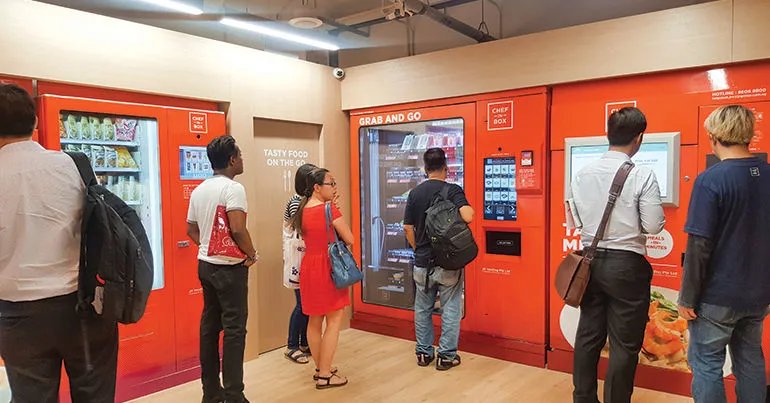

# Постановка задачі

1. **Мета**: Головною метою цього проекту є визначення оптимальної стратегії облаштування зони самообслуговування з вендингових каво-автоматів, яка мінімізує час очікування виконання замовлення на одного клієнта (враховуючи час проведений в черзі), й середній час простою автоматів (коли автомати не приймають жодних клієнтів) за умови, що менеджмент ресурсами не входить в рамки моделі, і час роботи обмежений.

2. **Задачі**:
    - Розробити математичну модель, яка включає в себе не рівномірний потік клієнтів, зміну кількості клієнтів з плином часу.
    - Провести симуляцію роботи каво-автомата з потоком людей.
    - Мінімізувати середній час перебування клієнта в черзі (Знайти оптимальну стратегію для мінімізації середнього часу перебування клієнта в черзі).
        - При цьому мінімізувати середній час простою автомата (Середній час очікування автомата).
    - Виконати оптимізацію, порівнюючи різні стратегії, такі як:
        - Встановлення другого каво-автомату (і, можливо, більше).
3. **Об'єкт дослідження**: Об'єктом дослідження є процес роботи зони самообслуговування (що, наприклад, складається з вендингових автоматів будь-якого типу) зі змінним потоком клієнтів в часі.

4. **Предмет**: Предметом дослідження є концептуальна модель симуляції роботи каво-автоматів, черг з клієнтів.
        
5. **Кінцевий результат**: Очікуваним результатом проекту є оптимальна модель організації роботи зони з каво-автоматами в офісному комплексі. Оптимальна кількість каво-автоматів для встановлення в зоні самообслуговування.

# Методи, алгоритми, що були застосовані для симуляції.

Для генерації подій “клієнт прибув до черги” та “клієнт отримав своє замовлення” використовуються згенеровані значення випадкової величини з розподілу Пуассона з відповідними параметрами лямбда. Параметр лямбда для генерації події “Клієнт прибув до черги” береться з введених користувачем параметрів залежно від часу. А параметр лямбда для генерації події "клієнт отримав своє замовлення" - стале і не залежить від часу в симуляції. Потік таких подій називається потоком Пуассона.

- **Потік Пуассона** - це математична модель випадкового процесу, де події відбуваються незалежно одна від одної та з постійною середньою інтенсивністю у часі або у просторі. Цей процес описує кількість подій, які відбуваються протягом певного інтервалу часу або в певній області. Потік подій Пуасона характеризується тим, що кількість подій, що відбуваються за фіксований інтервал часу, має **розподіл Пуасcона з параметром лямбда**. Параметр лямбда представляє собою середню кількість подій, що відбулися за певний проміжок часу. Тобто інтенсивність подій.
- Ймовірність настання n подій за проміжок часу t :

$$ P(N(t) = n) = \frac{{e^{-\lambda t} \cdot (\lambda t)^n}}{{n!}} $$


- В такому потоці інтервали часу між подіями є випадковими величинами з **експоненційним розподілом** з відповідним потоку оберненим параметром 1/λ.
    - Ймовірність одного такого інтервалу визначається функцією цього розподілу:
$$
P(X \leq x) = 1 - e^{-\lambda x}
$$

## Методи, що були застосовані, для обробки даних в класі метрики.

- Для отримання середнього часу очікування клієнта, знаходиться математичне сподівання (вибіркове середнє) вибірки поступово утворюваної в ході симуляції з часу очікування кожного клієнта. Час очікування кожного клієнта формується як сума часу проведеного  в черзі + часу обслуговування.
  
- Для отримання середнього часу очікування кожного з автоматів, знаходиться математичне сподівання (вибіркове середнє) вибірки поступово утворюваної в ході симуляції з часу очікування кожного автомату на клієнта. 

## Методи, алгоритми, що були застосовані для оптимізації.

- Для оптимізації n-кількості каво-автоматів з метою мінімізації показників середнього часу очікування клієнта на своє замовлення (враховуючи чергу, звісно) та середнього часу очікування автомата на клієнта (під час простою), буде мінімізуватися цільова функція:
    - $f(x(n))=αx_1(n) +βx_2(n)$
    - $0<n<n*$
    - $n ∈ Z$
    - $n* ∈ Z$
    - в якій ваговий множник α - позначає важливість мінімізації середнього часу очікування клієнта, а β - середнього часу простою автомата. За замовчуванням вони дорівнюють одиниці, але користувач може ввести власні значення альфа і бета для отримання підходящої для нього цільової функції.

- В програмній реалізації для отримання оптимального значення параметру n в межах від 1 до n* послідовно будуються вибірки із 50 потрібних значень метрики - середнього часу очікування клієнта, та середнього часу очікування автоматів (якщо автоматів декілька береться середнє значення) для $n=1, ..., n^*-1$. Тобто виходить по 2 вибірки з 50 значень на кожній ітерації. Таких вибірок в результаті виходить $2(n^*-1)$. Після цього знаходяться вибіркові середні цих вибірок, які відповідають функціям $x_1(n)$ і $x_2(n)$.
  
- Підставляючи ці значення у цільову функцію, буде знайдене таке n, при якому функція буде мінімальною за допомогою алгоритму пошуку мінімуму.
  
- В результаті буде отриманий оптимальний розв’язок задачі мінімізації даної цільової функції. Тобто буде знайдена оптимальна n-кількість каво-автоматів.

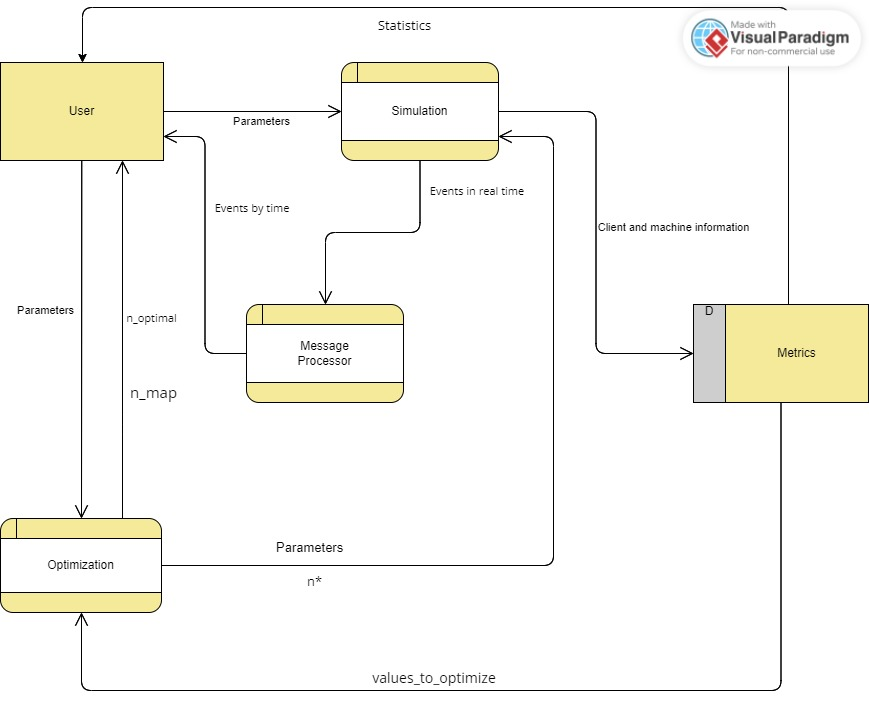

## Перелік використаних для реалізації інструментів (мови програмування, бібліотеки).

- Програма симуляції даної операції написана на мові програмування Python із застосуванням відповідних бібліотек.
  
- Для симуляції середовища була використана бібліотека  `simpy`. За допомогою її методу `Environment`, моделювалося середовище в якому проходила симуляція процесу змінного потоку клієнтів з плином часу.
  
- Для симуляції потоку клієнтів була використана, знову ж таки, бібліотека simpy. А саме метод `Environment.timeout()`, що фіксував час настання події появи клієнта (новий клієнт встає в чергу), події - клієнт стає біля автомату щоб зробити замовлення та події - клієнт отримав своє замовлення.
  
- За допомогою методу бібліотеки numpy `random.exponential(λ)` генерується час настання події - новий клієнт встає в чергу. В залежності від часу параметр λ за яким генерується час настання цієї події в середовищі, що симулюється, буде відповідати введеному користувачем параметру.
  
- Клієнти знаходяться в черзі одразу до багатьох автоматів, тобто якщо звільняється один з n-ої кількості автоматів, його одразу ж займає перша людина в черзі. Якщо ж у клієнта є вибір, яким вільним автоматом скористатися, він згенерується як випадкове число методом `numpy.random.randint` в межах числа вільних автоматів.

## Результати роботи програми у вигляді таблиці, графіка, діаграми тощо.

### Результати симуляції

Введіть параметри: 

Початковий час симуляції: 

Введіть годину: `8`

Введіть хвилину: `30`

Введіть секунду: `0`

Скільки часу продовжуватиметься симуляція (в годинах): `8`

Кількість встановлених машин: `2`

Список вхідних параметрів лямбда, що позначають інтенсивність потоку клієнтів в годину (починаючи з початкового часу симуляції по-годинно індекс позначає годину з моменту початку симуляції): 

Введіть параметр лямбда, що відповідає часу [08:30:00 - 09:30:00] : `60`

Введіть параметр лямбда, що відповідає часу [09:30:00 - 10:30:00] : `65`

Введіть параметр лямбда, що відповідає часу [10:30:00 - 11:30:00] : `69`

Введіть параметр лямбда, що відповідає часу [11:30:00 - 12:30:00] : `80`

Введіть параметр лямбда, що відповідає часу [12:30:00 - 13:30:00] : `75`

Введіть параметр лямбда, що відповідає часу [13:30:00 - 14:30:00] : `50`

Введіть параметр лямбда, що відповідає часу [14:30:00 - 15:30:00] : `48`

Введіть параметр лямбда, що відповідає часу [15:30:00 - 16:30:00] : `44`

Скільки клієнтів автомат здатний обслужити за годину: `120`

Скільки часу займає приготування кави (в секундах): `60`


__________________________________________________
Результати симуляції: 

___________________________________________________________
Кількість клієнтів, що прибули: `474`

Кількість обслужених клієнтів: `473`

Максимальний час очікування клієнта: `13 хв. 56 с.`, `о 11:37:24`, `біля 1-го автомату`

Мінімальний час очікування клієнта: `1 хв. 0 с.`, `о 14:55:53`, `біля 1-го автомату`

Середній час очікування клієнта: `3 хв. 28 с. `
___________________________________________________________

Загальний час ефективної роботи 1-го автомата: `5 год. 52 хв. 2 с. `

Загальний час ефективної роботи 2-го автомата: `6 год. 3 хв. 15 с. `
___________________________________________________________

Загальний час очікування 1-го автомата на клієнта\ів: `4 год. 0 хв. 7 с. `

Загальний час очікування 2-го автомата на клієнта\ів: `3 год. 34 хв. 25 с. `
___________________________________________________________

Максимальний час очікування 1-го автомата на клієнта\ів: `11 хв. 30 с.`, `клієнт перебив очікування о 15:29:47`

Максимальний час очікування 2-го автомата на клієнта\ів: `7 хв. 54 с.`, `клієнт перебив очікування о 15:45:18`
___________________________________________________________

Мінімальний час очікування 1-го автомата на клієнта\ів: `2 хв. 14 с.`, `клієнт перебив очікування о 11:11:51`

Мінімальний час очікування 2-го автомата на клієнта\ів: `0 с.`, `клієнт перебив очікування о 09:36:34`

___________________________________________________________
Середній час очікування 1-го автомата на клієнта\ів: `2 хв. 12 с`.

Середній час очікування 2-го автомата на клієнта\ів: `1 хв. 43 с`.
___________________________________________________________


### Результати оптимізації 

Введіть поріг n-кількості машин (n_max): `7`


Введіть режим оптимізації (з введенням вагових параметрів альфа і бета чи за замовчуванням alpha=beta=1) 

1. За замовчуванням. Мінімізація середнього часу очікування клієнта + середнього часу очікування автомата на клієнта.

2. З можливістю обрати вагові параметри.
    

`1`

Результати експерименту: 
___________________________________________________________

Середній час очікування клієнта для n = 1:  `5615.7 с.`

Середній час очікування автомата для n = 1:  `63.79 с.`

___________________________________________________________

Середній час очікування клієнта для n = 2:  `222.02 с.`

Середній час очікування автомата для n = 2:  `107.56 с.`
___________________________________________________________

Середній час очікування клієнта для n = 3:  `113.88 с.`

Середній час очікування автомата для n = 3:  `146.5 с.`

___________________________________________________________

Середній час очікування клієнта для n = 4:  `102.46 с.`

Середній час очікування автомата для n = 4:  `204.5 с.`

___________________________________________________________

Середній час очікування клієнта для n = 5:  `99.78 с.`

Середній час очікування автомата для n = 5:  `271.27 с.`

___________________________________________________________


Середній час очікування клієнта для n = 6:  `98.7 с.`

Середній час очікування автомата для n = 6:  `335.04 с.`

___________________________________________________________


Середній час очікування клієнта для n = 7:  `98.02 с.`

Середній час очікування автомата для n = 7:  `412.11 с.`

___________________________________________________________


Результати оптимізації:


Оптимальна кількість каво-машин для мінімізації цих показників (для параметрів alpha = 1; beta = 1)
`n_optimal = 3`